### Формирование задания на проект.
Проект готовится на основания данных о пользователях магазина компьютерных игр "Стримчик", собранных до 2016 года, с целью формирования компании на будущий год и выявления факторов, определяющих популярность компьютерных игр у разных категорий.
В наличии следующие данные: 
- названия игр;
- названия платформ, на которых игры выходили;
- год выпуска;
- жанр;
- возрастной рейтинг от компании ESRB;
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)

### Изучим данные, проведём обработку:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Следует заменить регистр в названиях столбцов:

In [4]:
games.columns = games.columns.str.lower()
games['name'].value_counts()

Need for Speed: Most Wanted                   12
Ratatouille                                    9
LEGO Marvel Super Heroes                       9
Madden NFL 07                                  9
FIFA 14                                        9
                                              ..
Jikkyou Powerful Pro Yakyuu 2000 Ketteiban     1
Littlest Pet Shop: Winter                      1
I Spy: Universe                                1
True Pinball                                   1
Evil Genius                                    1
Name: name, Length: 11559, dtype: int64

Рассчитаем отношение пропусков в  столбцах к общему количеству строк:

In [5]:
games.isnull().sum()/games.count()

name               0.000120
platform           0.000000
year_of_release    0.016357
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       1.054197
user_score         0.669163
rating             0.680068
dtype: float64

Пропуски обнаружены в столбцах:
- name - так как на данных о названиях игр базируется исследование, пропуски удалим.
- год выхода - нет данных для замены, заполним нулями, чтобы не удалять нужную информацию по играм.
- оценки критиков, пользователей и возрастной рейтинг - пропуски заполнить нечем, оставим пустыми, так как удалять нельзя в связи с большим количеством пропусков. 
Пропуски в данных столбцах могли возникнуть, потому что это не обязательный к заполнению атрибут.

In [6]:
games = games.dropna(subset = ['name'])
games['critic_score'] = games['critic_score'].fillna(value = 0)
games['user_score'] = games['user_score'].fillna(value = 0)
games['rating'] = games['rating'].fillna(value = 'Nan')
games['year_of_release'] = games['year_of_release'].fillna(value = 0)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


- Заменим типы данных: на целые числа (int) год выхода, рейтинг критиков.  

In [7]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['critic_score'] = games['critic_score'].astype(int)
games['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура tbd значит to be determined - то есть, данные были нарочно не заполнены, так как пользователи не определились с рейтингом. Поэтому необходимо заменить tbd на Nan, а затем изменить тип переменных в столбце. 

In [8]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)
games['user_score'] = games['user_score'].fillna(0)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


- Посчитаем суммарные продажи игр:

In [9]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Проведём исследовательский анализ данных:

- Проверим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [10]:
games_years = games.pivot_table( index = ('year_of_release'), values = ('name'), aggfunc = 'count')
games_years.head(10)

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


В нашем распоряжении данные, начиная с 1980 года выпуска игр. Так как рынок кормпьютерных игр очень быстро меняется, достаточно будет рассматривать критерии, формирующие привлекательность игр, за актуальный период, границы которого предстоит установить. Также выявлено, что для 269 игр не указан год выпуска.

In [11]:
games_sales = games.pivot_table(index = ('platform', 'year_of_release'), values = ('sales'), aggfunc = 'sum').reset_index()
games_sales

,platform,year_of_release,sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


In [12]:
#Выберем 5 платформ с наибольшими суммарными продажами:
games_sales.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(
    by = 'sales', ascending = False).head(5)


,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


<AxesSubplot:title={'center':'Продажи PS2 по годам'}, xlabel='Год выпуска'>

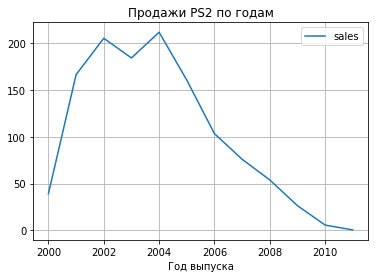

In [13]:
games_sales.query('year_of_release > 0').query('platform == "PS2"').plot(
    xlabel = 'Год выпуска', title = "Продажи PS2 по годам", x = "year_of_release", grid = True)

<AxesSubplot:title={'center':'Продажи X360 по годам'}, xlabel='Год выпуска'>

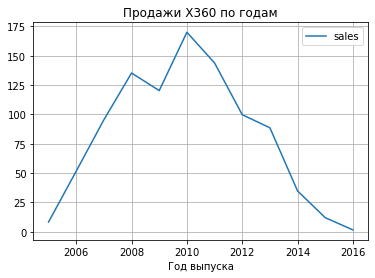

In [14]:
games_sales.query('year_of_release > 0').query('platform == "X360" ').plot(
    xlabel = 'Год выпуска', title = "Продажи X360 по годам", x = "year_of_release", grid = True) 

<AxesSubplot:title={'center':'Продажи PS3 по годам'}, xlabel='Год выпуска'>

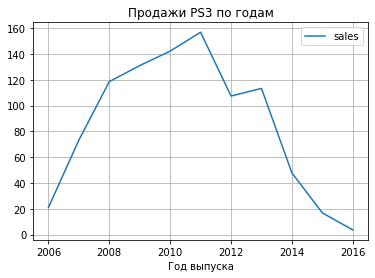

In [15]:
games_sales.query('year_of_release > 0').query('platform == "PS3" ').plot(
    xlabel = 'Год выпуска', title = "Продажи PS3 по годам", x = "year_of_release", grid = True) 

<AxesSubplot:title={'center':'Продажи Wii по годам'}, xlabel='Год выпуска'>

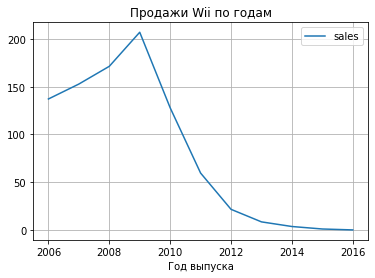

In [16]:
games_sales.query('year_of_release > 0').query('platform == "Wii" ').plot(
    xlabel = 'Год выпуска', title = "Продажи Wii по годам", x = "year_of_release", grid = True) 

<AxesSubplot:title={'center':'Продажи DS по годам'}, xlabel='Год выпуска'>

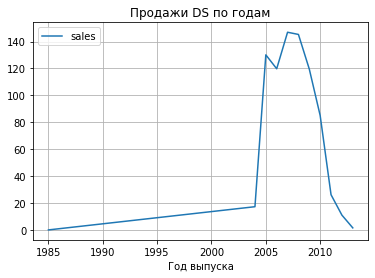

In [17]:
games_sales.query('year_of_release > 0').query('platform == "DS" ').plot(
    xlabel = 'Год выпуска', title = "Продажи DS по годам", x = "year_of_release", grid = True) 

Анализ распределения продаж по пяти платформам с наибольшими продажами показал, что средний срок "жизни" платформы составляет 10 лет. В связи с этим далее в исследовании будут учитываться данные за 2006 - 2016 года.

- Примем, что актуальным является период 2 года с 2014 по 2016 года. Отфильтруем таблицу.

In [18]:
games_sales_actual = games.query('year_of_release > = 2014')

In [19]:
#Выберем 5 платформ с наибольшими суммарными продажами за последние 10 лет:
print('Платформы с наибольшим числом продаж за последние 2 года:')
games_sales_actual.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(
    by = 'sales', ascending = False).head(5)

Платформы с наибольшим числом продаж за последние 2 года:


,sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [20]:
print('Платформы с наименьшим числом продаж за последние 2 года:')
games_sales_actual.pivot_table(index = 'platform', values = 'sales', aggfunc = 'sum').sort_values(
    by = 'sales', ascending = True).head(5)

Платформы с наименьшим числом продаж за последние 2 года:


,sales
platform,
PSP,0.36
Wii,5.07
PSV,22.40
PC,27.05
WiiU,42.98


<AxesSubplot:title={'center':'sales'}, xlabel='platform'>

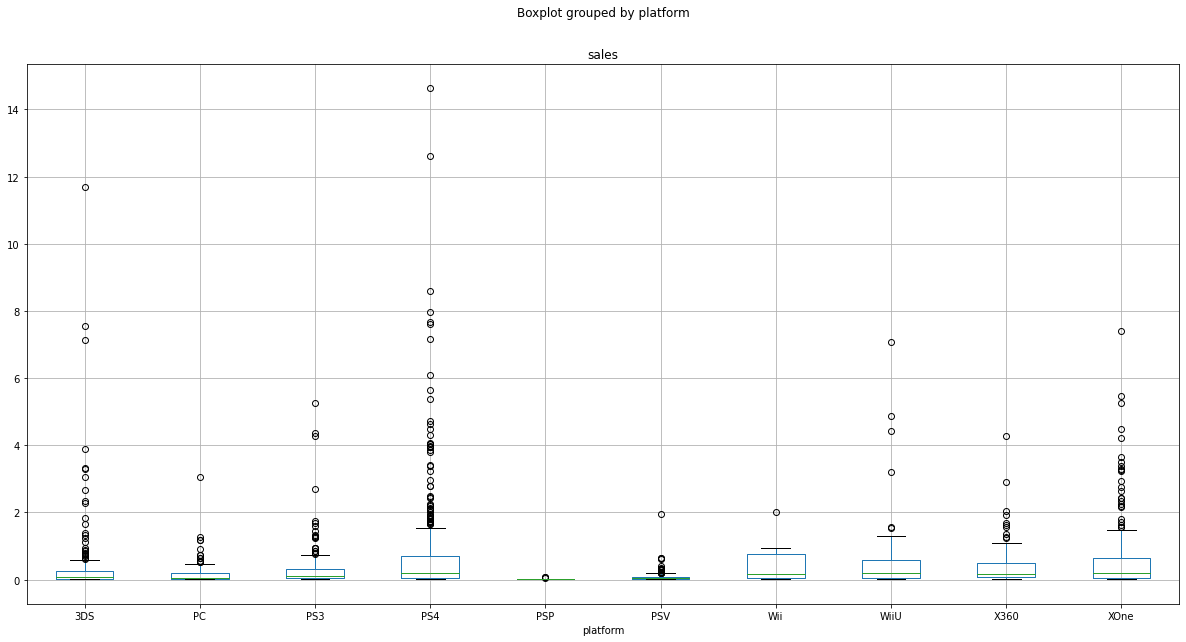

In [21]:
games_sales_actual.boxplot(by = 'platform', column = 'sales', figsize = (20,10))

(0.0, 2.0)

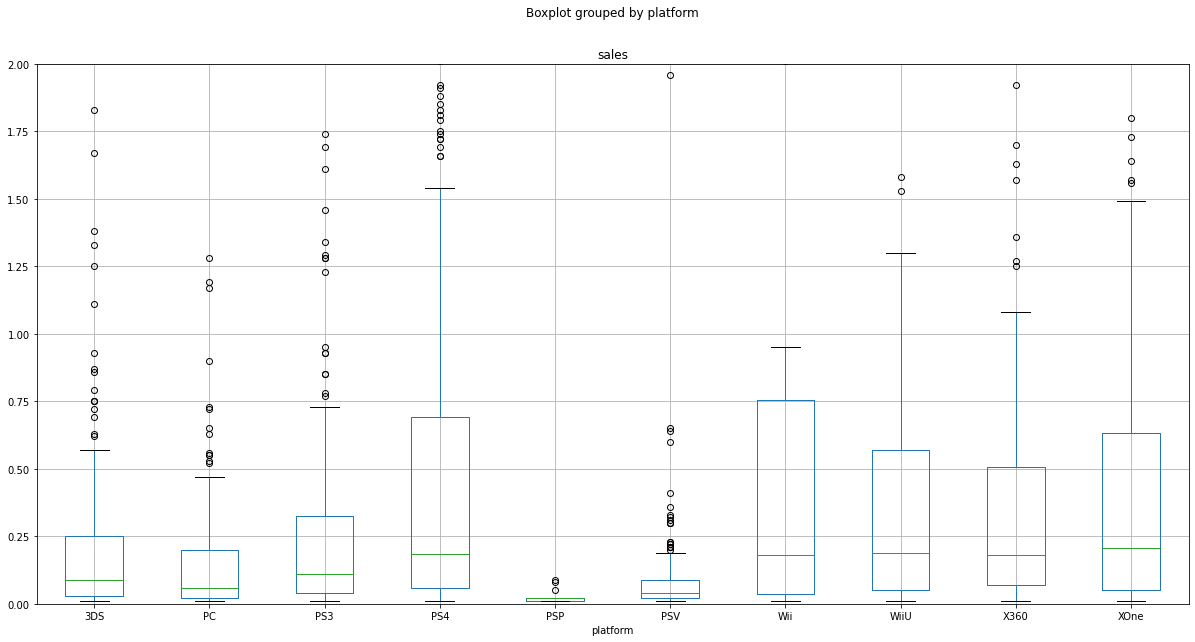

In [22]:
games_sales_actual.boxplot(by = 'platform', column = 'sales', figsize = (20,10))
plt.ylim(0, 2)

- По графику разброса глобальных продаж с разбивкой по платформам видно, что медианное значение продаж за последние 2 года находится в пределах 250 000 в год. Подтвердились данные по платформам лидерам и аутсайдерам по продажам. Стоит отметить, что лидеры продаж PS4 и XOne имеют широкий диапазон положительных значений, смещение в положительную сторону, в то время, как платформа 3DS лидерует за счёт большого количества выбросов, а значит делать ставку на её прибыльность преждевременно.

- На примере платформы PS4 рассмотрим зависимость между продажами и отзывами пользователей и критиков.

(-0.04013158947269733, 0.40266141068104094)

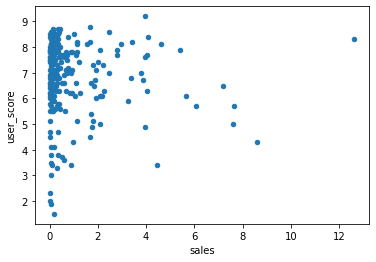

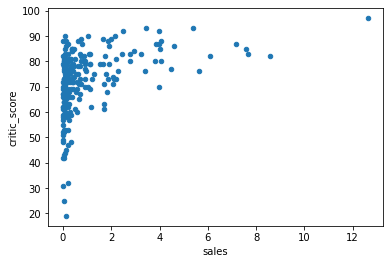

In [23]:
games_ps4_users = games_sales_actual.query('platform == "PS4"')
games_ps4_users = games_ps4_users.query('user_score != 0')

games_ps4_users.plot(x = 'sales', y = 'user_score', kind = 'scatter')

games_ps4_critic = games_sales_actual.query('platform == "PS4"')
games_ps4_critic = games_ps4_critic.query('critic_score !=0')
games_ps4_critic.plot(x = 'sales', y = 'critic_score', kind = 'scatter')

games_ps4_users['sales'].corr(games_ps4_users['user_score']), games_ps4_critic['sales'].corr(games_ps4_critic['critic_score'])

### Вывод: 
Между оценками пользователей и общими продажами отсутствует корреляция (значение коэффициента корреляции -4%). Между оценками критиков и продажами есть небольшая прямо пропорциональная зависимость (значение около 40%).

(-0.0703839280647581, 0.42867694370333226)

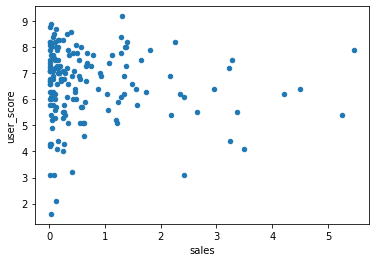

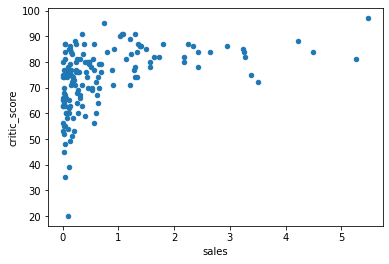

In [24]:
#Исследуем взаимосвязь на основе платформы XOne:
games_XOne_users = games_sales_actual.query('platform == "XOne"') 
games_XOne_users = games_XOne_users.query('user_score !=0')
                                            
games_XOne_users.plot(x = 'sales', y = 'user_score', kind = 'scatter')

games_XOne_critic = games_sales_actual.query('platform == "XOne"') 
games_XOne_critic = games_XOne_critic.query('critic_score !=0')

games_XOne_critic.plot(x = 'sales', y = 'critic_score', kind = 'scatter')

games_XOne_users['sales'].corr(games_XOne_users['user_score']), games_XOne_critic['sales'].corr(games_XOne_critic['critic_score'])


(-0.138444570945665, 0.5257228356581523)

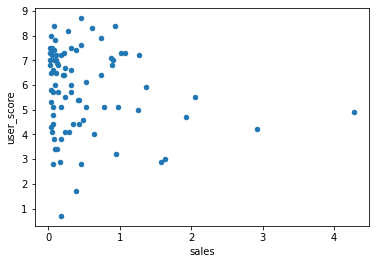

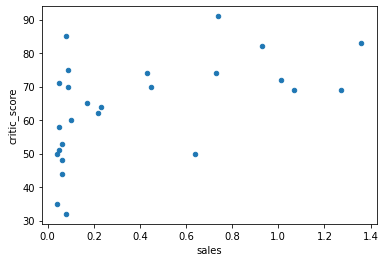

In [25]:
#Исследуем взаимосвязь на основе платформы X360:
games_X360_users = games_sales_actual.query('platform == "X360"') 
games_X360_users = games_X360_users.query('user_score !=0')
                                            
games_X360_users.plot(x = 'sales', y = 'user_score', kind = 'scatter')

games_X360_critic = games_sales_actual.query('platform == "X360"') 
games_X360_critic = games_X360_critic.query('critic_score !=0')

games_X360_critic.plot(x = 'sales', y = 'critic_score', kind = 'scatter')

games_X360_users['sales'].corr(games_X360_users['user_score']), games_X360_critic['sales'].corr(games_X360_critic['critic_score'])

array([<AxesSubplot:ylabel='sales'>], dtype=object)

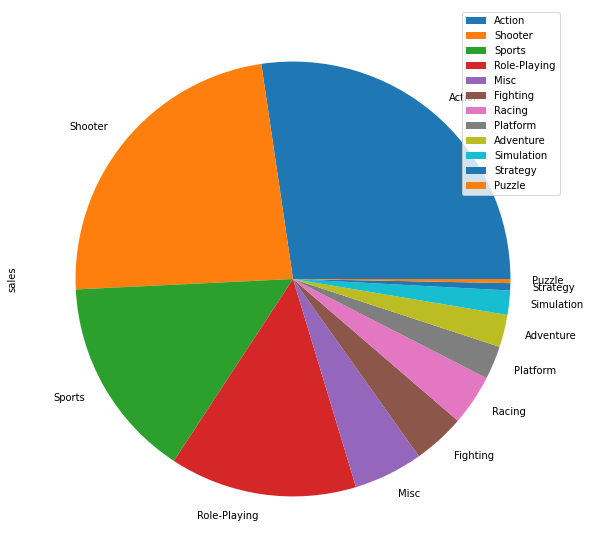

In [26]:
#Определим жанры-лидеры по продажам за последние 10 лет: 
games_sales_actual.pivot_table(index = 'genre', values = 'sales', aggfunc = 'sum').sort_values(
    by = 'sales', ascending = False).plot(kind = 'pie', subplots=True, figsize = (10,10))

В распределении игр по жанрам наблюдается значительная разница (в 15 раз) между жанрами с наибольшими показателями по продажам (Action, Sports, Shooter) и наименьшими (Strategy, Puzzle, Adventure).

array([<AxesSubplot:ylabel='sales'>], dtype=object)

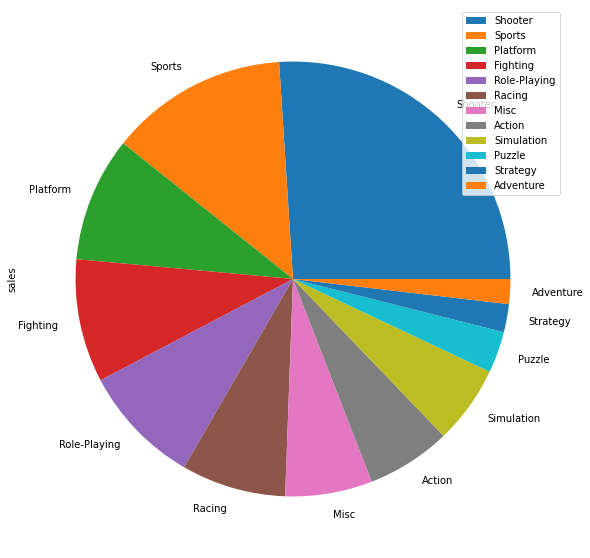

In [27]:
games_sales_actual.pivot_table(index = 'genre', values = 'sales', aggfunc = 'mean').sort_values(
    by = 'sales', ascending = False).plot(kind = 'pie', subplots=True, figsize = (10,10))

### Вывод:
Наибольшую прибыль приносят продажи в жанрах Shooter, Sports, Platform и Fighting.

- Определим лидеров продаж по регионам:

<AxesSubplot:title={'center':'Продажи в Северной Америке за последние 2 года, млн проданных копий'}, xlabel='platform'>

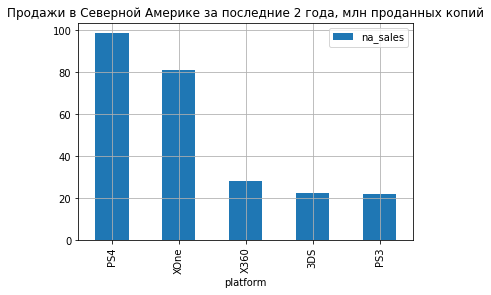

In [28]:
games_sales_actual.pivot_table(index = ('platform'), values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'Продажи в Северной Америке за последние 2 года, млн проданных копий', grid = True)

<AxesSubplot:title={'center':'Продажи в Европе за последние 2 года, млн проданных копий'}, xlabel='platform'>

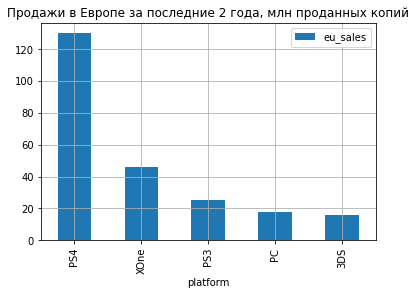

In [29]:
games_sales_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'Продажи в Европе за последние 2 года, млн проданных копий', grid = True)

<AxesSubplot:title={'center':'Продажи в Японии за последние 2 года, млн проданных копий'}, xlabel='platform'>

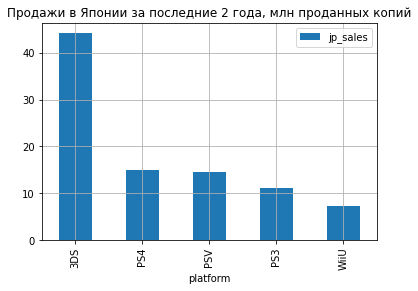

In [30]:
games_sales_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'Продажи в Японии за последние 2 года, млн проданных копий', grid=True)

### Вывод:
В Северной Америке лидируют продажи на платформах PS4 и XОne (100 и 80 млн проданных копий), более чем в 2 раза меньше продаж по платформам X360, 3DS и PS3 (30, 20 и 20 млн копий).
В Европе продано 130 млн копий на платформе PS4, 50 млн - Xone, и около 20 млн на каждой из платформ PS3, PC, 3DS. В Японии продано 50 млн на платформе 3DS, по 15 млн - PS4 и PSV, около 10 млн PS3, 8 млн WiiiU.

<AxesSubplot:title={'center':'ТОП-5 жанров-лидеров продаж в Северной Америке за период 2014-2016 гг'}, xlabel='genre'>

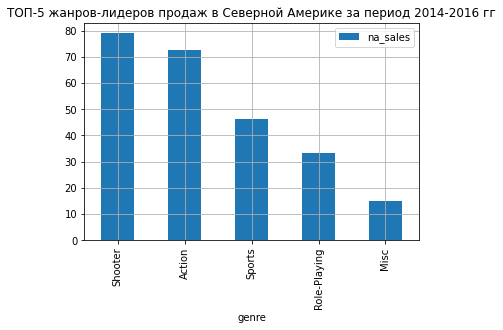

In [31]:
games_sales_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').reset_index().sort_values(
    by = 'na_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'ТОП-5 жанров-лидеров продаж в Северной Америке за период 2014-2016 гг', x = 'genre', grid = 'True')

<AxesSubplot:title={'center':'ТОП-5 жанров-лидеров продаж в Европе за период 2014-2016 гг'}, xlabel='genre'>

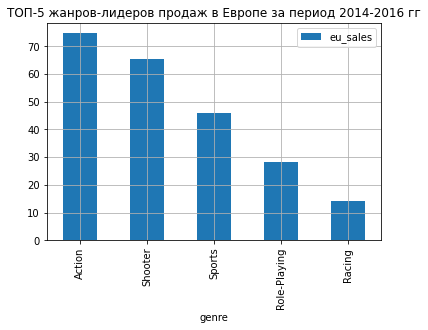

In [32]:
games_sales_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'ТОП-5 жанров-лидеров продаж в Европе за период 2014-2016 гг', grid = 'True')

<AxesSubplot:title={'center':'ТОП-5 жанров-лидеров продаж в Японии за период 2014-2016 гг'}, xlabel='genre'>

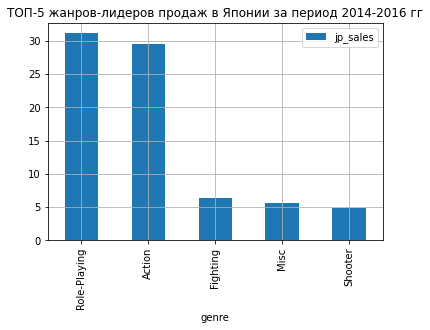

In [33]:
games_sales_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).head(5).plot(
    kind = 'bar', title = 'ТОП-5 жанров-лидеров продаж в Японии за период 2014-2016 гг', grid = True)

### Вывод: 
В Северной Америке среди жанров лидируют Shooter, Action, Sports (80, 72 и 48 млн проданных копий соответственно), в Европе Action, Shooter, Sports (74, 65, 48 млн копий), в Японии - Role-Playing, Action (32, 30 млн копий). 

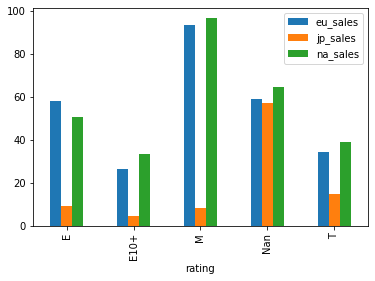

In [34]:
#Отобразим на графике зависимость между рейтингом ESBR и продажами в регионах:
games_esbr = games_sales_actual.pivot_table(index = 'rating', 
                                            values = ('jp_sales', 'eu_sales', 'na_sales'), aggfunc = 'sum').reset_index().plot(kind = 'bar',x='rating')

<id = 'error'>
### Вывод: 

В Европе и Северной Америке больше всего игр продаётся в категории М, на втором месте в Европе продади игр без категории и с категорией Е, в Северной Америке - игр без категории. В Японии больше всего продаж игр без категории, так как организация ESBR не работает на японском рынке и игр без маркировки ESBR в Японии преобладающее количество.

### Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Нулевая гипотеза будет звучать как "Средние пользовательские рейтинги платформ Xbox One и PC равны". Альтернативная гипотеза может звучать как "Средние пользовательские рейтинги платформ Xbox One и PC не равны". Проверим нулевую гипотезу по методу сравнения среднего выборочного двух генеральных совокупностей.

In [35]:
games_sales_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [36]:
games_gip = games.query('user_score !=0')

In [37]:
alpha = 0.05
xbox = games_gip.query('platform == "XOne"')
xbox = xbox['user_score']
pc = games_gip.query('platform == "PC"')
pc = pc['user_score']
result = st.stats.ttest_ind(xbox,pc)
if result.pvalue<alpha:
    print ("Отвергаем нулевую гипотезу")
else:
    print ('Не получилось отвергнуть гипотезу')   

Отвергаем нулевую гипотезу


/tmp/ipykernel_150/3966213566.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  result = st.stats.ttest_ind(xbox,pc)


Нулевая гипотеза отвергнута, следовательно мы принимаем альтернативную: средние пользовательские рейтинги платформ Xbox One и PC не равны.

- Проверяем нулевую гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Альтернативной будет гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны"

In [38]:
alpha = 0.05
action = games_gip.query('genre == "Action"')
action = action['user_score']
sports = games_gip.query('genre == "Sports"')
sports = sports['user_score']
result = st.stats.ttest_ind(action,sports)
if result.pvalue<alpha:
    print ("Отвергаем нулевую гипотезу")
else:
    print ('Не получилось отвергнуть гипотезу')

Не получилось отвергнуть гипотезу


/tmp/ipykernel_150/928013263.py:6: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  result = st.stats.ttest_ind(action,sports)


Нулевую гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" не получилось отвергнуть, следовательно мы её принимаем, принимаем альтернативную гипотезу средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

### Вывод:
Исследования в проекте производились на основании актуального периода - 2 прошедших года.
Выявлены платформы-лидеры по продажам за указанный период: PS4 (288,15 млн), X360 (140,36 млн). Самые низкие продажи отмечены по платформам Wii - 5,07 млн и PSP - 0,36 млн.
На основании общего распределения продаж получены выводы: среднее количество прдаваемых игр по всем платформам составляет 50 млн копий.
На основании анализа трёх прибыльных платформ было установлено, что зависимости между оценками пользователей и количеством продаж нет, однако продажи увеличиваются прямо пропорционально оценкам критиков.
В целом наиболее прибыльными являются игры в жанрах Action, Sports и Shooter, та же закономерность наблюдается в странах Северной Америки и Европы. В Японии лидируют жанры Role-Playing, Action.
Лидерство в общем количестве продаж в странах Северной Америки и Европы составляют платформы XOne и PS4, в Японии - 3DS. 
Стоит отметить, что доля продаж жителям Японии в 2,5 раза меньше, чем в Северной Америке и Европе.
Также получены выводы о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны, и средние пользовательские рейтинги платформ Xbox One и PC также равны.
Таким образом, на текущий момент потенциально прибыльными являются платформы XOne и PS4, для продвижения на рынке Японии следует обратить внимание на платформу 3DS. Жанрами, приносящими наибольшую прибыль, являются - Action, Sports и Shooter, для Японии - это Role-Playing, Action. 